<a href="https://colab.research.google.com/github/magomezma-svg/Senales-y-sistemas/blob/main/PARCIAL_1_MARIBEL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PARCIAL 1: SEÑALES Y SISTEMAS 2025_II**

**NOMBRE: MARIBEL GOMEZ MANCHOLA CC:1122732770**

**PREGUNTAS**

**1** La distancia media entre dos señales periódicas x1(t) ∈ ℝ,ℂ y x2(t) ∈ ℝ,ℂ; se puede expresar a partir de la potencia media de la diferencia entre ellas:

d²(x1, x2) = P̄{x1−x2} = lim{T→∞} (1/T) ∫_T |x1(t) − x2(t)|² dt

Sea x1(t) y x2(t) dos señales definidas como:

x1(t) = A·e^(−j n ω0 t)

x2(t) = B·e^( j m ω0 t)

con ω0 = 2π/T; T, A, B ∈ ℝ⁺ y n, m ∈ ℤ.

Determine la distancia entre las dos señales. Compruebe sus resultados con Python.

SOLUCIÓN

In [1]:
# Álgebra simbólica
import sympy as sym

# Símbolos
t, T, A, B = sym.symbols('t T A B', real=True)
n, m = sym.symbols('n m', real=True, integer=True)
w0 = 2*sym.pi/T  # ω0 = 2π/T

# Señales del enunciado
x1 = A * sym.exp(-sym.I * n * w0 * t)
x2 = B * sym.exp( sym.I * m * w0 * t)

# Potencias medias individuales: (1/T)∫|xi|^2dt  → A^2 y B^2
Px1 = (1/T) * sym.integrate(x1 * sym.conjugate(x1), (t, 0, T))
Px2 = (1/T) * sym.integrate(x2 * sym.conjugate(x2), (t, 0, T))

# Término cruzado equivalente: −(1/T)∫(x1x2* + x1*x2)dt  → se usa −2/T ∫ x1x2* dt
C12 = (-2/T) * sym.integrate(x1 * sym.conjugate(x2), (t, 0, T))

# Distancia media al cuadrado d^2 (Sympy devuelve Piecewise en función de m+n)
d2 = sym.simplify(Px1 + Px2 + C12)

# Ramas (expr, condición) del Piecewise
pairs = d2.args

# Distancia d por ramas: sqrt(expr); si expr = (A−B)^2, reemplazo por |A−B|
d = sym.Piecewise(*[(sym.Abs(A - B) if sym.simplify(e - (A - B)**2) == 0 else sym.sqrt(sym.simplify(e)), c) for e, c in pairs])

# Salidas: d^2 por casos y luego d por casos
sym.pprint(d2)
sym.pprint(d)

⎧     2    2                
⎪    A  + B       for m ≠ -n
⎨                           
⎪ 2            2            
⎩A  - 2⋅A⋅B + B   otherwise 
⎧   _________            
⎪  ╱  2    2             
⎨╲╱  A  + B    for m ≠ -n
⎪                        
⎩  │A - B│     otherwise 


**2** Encuentre la señal en tiempo discreto al utilizar un conversor
 análogo digital con frecuencia de muestreo de 5kHz y 4 bits
 de capacidad de representación, aplicado a la señal continua:

 x(t) = 3cos (1000πt) + 5sin (3000πt) + 10cos (11000πt)

Realizar la simulación del proceso de discretización (inclu
yendo al menos tres periodos de x(t)). En caso de que la dis
cretización no sea apropiada, diseñe e implemente un con
versor adecuado para la señal estudiada.

**SOLUCIÓN**

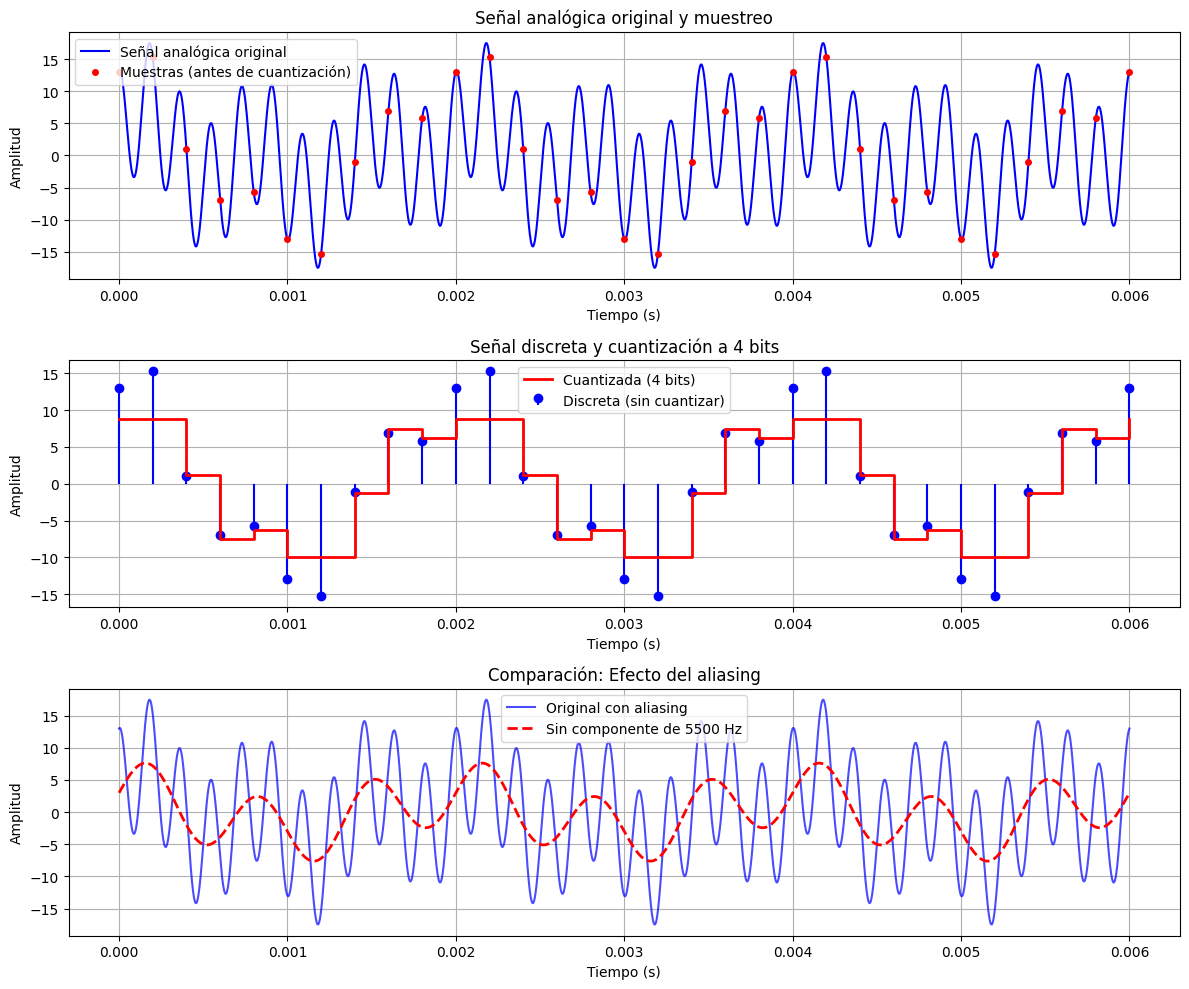

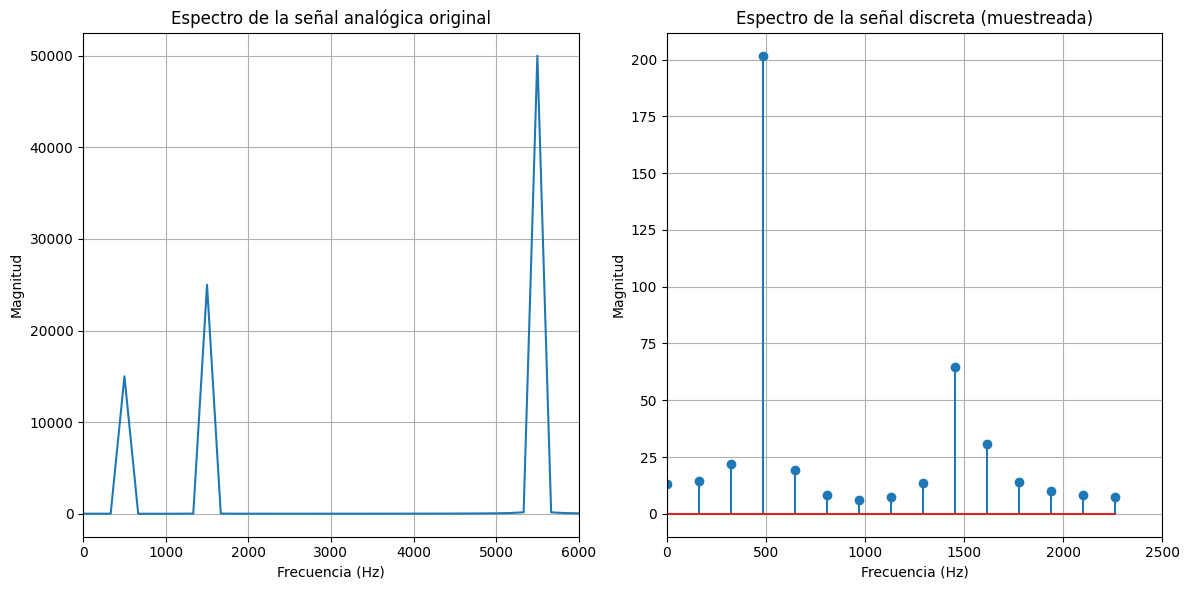

=== ANÁLISIS DE ALIASING ===
Frecuencia de muestreo: 5000 Hz
Frecuencia de Nyquist: 2500.0 Hz
Componente problemática: 5500 Hz
Frecuencia de aliasing: 500 Hz
La componente de 5500 Hz aparece como 500 Hz

=== INFORMACIÓN DE CUANTIZACIÓN ===
Bits: 4, Niveles: 16
Error RMS de cuantización: 3.1809 V


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 5000  # Frecuencia de muestreo en Hz
T = 1/fs   # Periodo de muestreo
bits = 4   # Bits de cuantización

# Señal analógica original
def x_analog(t):
    return 3*np.cos(1000*np.pi*t) + 5*np.sin(3000*np.pi*t) + 10*np.cos(11000*np.pi*t)

# Frecuencia fundamental de la señal resultante
f_resultante = 500  # Hz (máximo común divisor aproximado)
T_signal = 1/f_resultante  # Periodo de la señal

# Tiempo para 3 periodos
t_total = 3 * T_signal
t_analog = np.linspace(0, t_total, 10000)  # Alta resolución para señal analógica

# Muestreo
n_samples = int(t_total * fs) + 1
t_discreto = np.arange(n_samples) * T
x_discreto = x_analog(t_discreto)

# Cuantización a 4 bits
def quantize(signal, bits, v_range=(-10, 10)):
    v_min, v_max = v_range
    q_levels = 2**bits
    q_step = (v_max - v_min) / q_levels

    # Normalizar a niveles de cuantización
    signal_quantized = np.round((signal - v_min) / q_step)
    # Asegurar que esté en el rango [0, q_levels-1]
    signal_quantized = np.clip(signal_quantized, 0, q_levels-1)
    # Convertir de vuelta a voltaje
    return signal_quantized * q_step + v_min

x_quantized = quantize(x_discreto, bits)

# Señal esperada sin aliasing (para comparación)
def x_sin_aliasing(t):
    return 3*np.cos(1000*np.pi*t) + 5*np.sin(3000*np.pi*t)

# Gráficas
plt.figure(figsize=(12, 10))

# Señal analógica original
plt.subplot(3, 1, 1)
plt.plot(t_analog, x_analog(t_analog), 'b-', linewidth=1.5, label='Señal analógica original')
plt.plot(t_discreto, x_discreto, 'ro', markersize=4, label='Muestras (antes de cuantización)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal analógica original y muestreo')
plt.grid(True)
plt.legend()

# Señal discreta y cuantizada
plt.subplot(3, 1, 2)
plt.stem(t_discreto, x_discreto, 'b-', markerfmt='bo', basefmt=" ", label='Discreta (sin cuantizar)')
plt.step(t_discreto, x_quantized, 'r-', where='post', linewidth=2, label='Cuantizada (4 bits)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal discreta y cuantización a 4 bits')
plt.grid(True)
plt.legend()

# Comparación con señal sin aliasing
plt.subplot(3, 1, 3)
plt.plot(t_analog, x_analog(t_analog), 'b-', alpha=0.7, label='Original con aliasing')
plt.plot(t_analog, x_sin_aliasing(t_analog), 'r--', linewidth=2, label='Sin componente de 5500 Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Comparación: Efecto del aliasing')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Análisis espectral
from scipy.fft import fft, fftfreq

# FFT de la señal original (en alta resolución)
N_fft = 10000
f_fft = fftfreq(N_fft, t_analog[1]-t_analog[0])
X_fft = fft(x_analog(t_analog[:N_fft]), N_fft)

# FFT de la señal discreta
N_fft_d = len(x_discreto)
f_fft_d = fftfreq(N_fft_d, T)
X_fft_d = fft(x_discreto, N_fft_d)

plt.figure(figsize=(12, 6))

# Espectro original
plt.subplot(1, 2, 1)
plt.plot(f_fft[:N_fft//2], np.abs(X_fft[:N_fft//2]))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de la señal analógica original')
plt.grid(True)
plt.xlim(0, 6000)

# Espectro discreto
plt.subplot(1, 2, 2)
plt.stem(f_fft_d[:N_fft_d//2], np.abs(X_fft_d[:N_fft_d//2]))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de la señal discreta (muestreada)')
plt.grid(True)
plt.xlim(0, 2500)  # Hasta fs/2

plt.tight_layout()
plt.show()

# Información del aliasing
print("=== ANÁLISIS DE ALIASING ===")
print(f"Frecuencia de muestreo: {fs} Hz")
print(f"Frecuencia de Nyquist: {fs/2} Hz")
print(f"Componente problemática: 5500 Hz")
print(f"Frecuencia de aliasing: {abs(5500 - fs)} Hz")
print(f"La componente de 5500 Hz aparece como {abs(5500 - fs)} Hz")

# Error de cuantización
error_quant = x_discreto - x_quantized
print(f"\n=== INFORMACIÓN DE CUANTIZACIÓN ===")
print(f"Bits: {bits}, Niveles: {2**bits}")
print(f"Error RMS de cuantización: {np.sqrt(np.mean(error_quant**2)):.4f} V")

**CONVERSOR**

In [3]:
# Diseño de filtro antialiasing (ejemplo)
from scipy.signal import butter, filtfilt

def diseñar_filtro_antialiasing(fs, fc=None, order=4):
    if fc is None:
        fc = fs/2 * 0.8  # Frecuencia de corte por debajo de Nyquist
    nyquist = fs/2
    normal_cutoff = fc / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Aplicar filtro antialiasing (simulación)
fs_adecuada = 12000  # Nueva frecuencia de muestreo
b, a = diseñar_filtro_antialiasing(fs_adecuada, fc=5000)

# Simular filtrado en señal de alta resolución
t_highres = np.linspace(0, t_total, 50000)
x_highres = x_analog(t_highres)
x_filtrado = filtfilt(b, a, x_highres)

print(f"\n=== CONVERSOR ADECUADO ===")
print(f"Frecuencia de muestreo recomendada: ≥ 11000 Hz")
print(f"Filtro antialiasing: Pasa-bajos con fc ≤ {fs_adecuada/2} Hz")


=== CONVERSOR ADECUADO ===
Frecuencia de muestreo recomendada: ≥ 11000 Hz
Filtro antialiasing: Pasa-bajos con fc ≤ 6000.0 Hz


**3**  Sea x(t) la segunda derivada de la señal x(t), donde t ∈
 [ti, tf]. Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular según:

 $$cn=\frac{1}{(t_i-t_f)n^2 \omega_0 ^2}\int_{t_i}^{t_f}x''(t)e^{-j n \omega_0 t}dt n ∈ Z$$

¿Cómo se pueden calcular los coeficientes an y bn desde
 x"(t) en la serie trigonométrica de Fourier?

**SOLUCIÓN PDF ADJUNTO CORREO**

**4** Encuentre el espectro de Fourier, su parte real,
 imaginaria, magnitud, fase y el error relativo para
 n∈{0,±1,±2,±3,±4,±5}, a partir de x(t) para la
 señal x(t) en la Figura 1 . Compruebe el espectro obtenido
 con la estimación a partir de x"(t). Presente las simulaciones
 de Python respectivas.

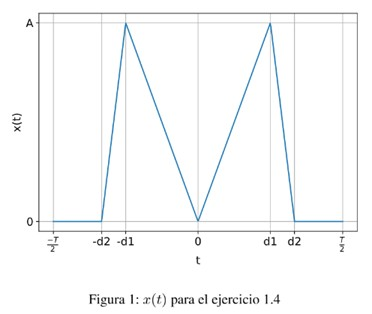

**SOLUCIÓN**

In [4]:
import numpy as np

class FourierSeriesCalculator:
    def __init__(self, A, T, d1, d2, N):
        # Validación de Parámetros
        if not (0 < d1 < d2 < T / 2):
            raise ValueError("Los parámetros deben cumplir 0 < d1 < d2 < T/2")

        # Parámetros de la Señal
        self.A = float(A)
        self.T = float(T)
        self.d1 = float(d1)
        self.d2 = float(d2)
        self.N = int(N)

        # Propiedades Derivadas
        self.w0 = 2 * np.pi / self.T                 # Frecuencia angular fundamental
        self.n_values = np.arange(-self.N, self.N + 1)  # n = -N, ..., 0, ..., N

    def calculate_coefficients(self):
        # Componente DC (n = 0)
        C0 = (self.A * self.d2) / self.T

        # n != 0
        mask_nonzero = (self.n_values != 0)
        n_nz = self.n_values[mask_nonzero].astype(float)
        n_w0 = n_nz * self.w0

        # Término D_n (vectorizado)
        term_dn = (
            (1.0 / self.d1)
            - (self.d2 / (self.d1 * (self.d2 - self.d1))) * np.cos(n_w0 * self.d1)
            + (1.0 / (self.d2 - self.d1)) * np.cos(n_w0 * self.d2)
        )
        Dn = (2.0 * self.A / self.T) * term_dn
        Cn_nz = -Dn / (n_w0 ** 2)

        # Ensamblaje del espectro Cn para n = -N..N
        Cn = np.zeros(self.n_values.shape, dtype=float)
        Cn[mask_nonzero] = Cn_nz
        # Insertar C0 exactamente en n = 0
        Cn[self.n_values == 0] = C0

        print(f"Cálculo optimizado de {Cn.size} coeficientes Cn realizado.")
        return Cn, self.n_values


# 2. EJECUCIÓN DEL CÁLCULO
# ========================
if __name__ == "__main__":
    # Parámetros de la Señal
    A_val = 5.0
    T_val = 10.0
    d1_val = 1.0
    d2_val = 4.0
    N_val = 5

    # 1) Crear instancia
    signal_analyzer = FourierSeriesCalculator(A=A_val, T=T_val, d1=d1_val, d2=d2_val, N=N_val)

    # 2) Calcular coeficientes
    Cn_spectrum_new, n_vals = signal_analyzer.calculate_coefficients()

    # 3) Mostrar resultados
    print("\nParámetros de la Señal:")
    print(f"  A={A_val}, T={T_val}, d1={d1_val}, d2={d2_val}, N={N_val}")
    print("\nÍndices n:", n_vals)
    print("Coeficientes Cn:", Cn_spectrum_new)

Cálculo optimizado de 11 coeficientes Cn realizado.

Parámetros de la Señal:
  A=5.0, T=10.0, d1=1.0, d2=4.0, N=5

Índices n: [-5 -4 -3 -2 -1  0  1  2  3  4  5]
Coeficientes Cn: [-0.27018982 -0.28639335 -0.42640129 -0.4375701   0.88241039  2.
  0.88241039 -0.4375701  -0.42640129 -0.28639335 -0.27018982]


In [5]:
import numpy as np
import sympy as sp

class FourierSeriesCalculator:
    # Calcula y verifica los coeficientes de la Serie de Fourier para una señal
    # triangular asimétrica y la reconstruye.

    def __init__(self, A, T, d1, d2, N):
        # Inicializa la calculadora con los parámetros de la señal.

        if not (0 < d1 < d2 < T / 2):
            raise ValueError("Los parámetros deben cumplir 0 < d1 < d2 < T/2")
        self.A, self.T, self.d1, self.d2, self.N = A, T, d1, d2, N
        self.w0 = 2 * np.pi / self.T
        self.n_values = np.arange(-self.N, self.N + 1)

    def calculate_coefficients(self):
        # Calcula el espectro de coeficientes Cn usando el método de la derivada.

        C0 = (self.A * self.d2) / self.T
        n_nonzero = self.n_values[self.n_values != 0]
        n_w0 = n_nonzero * self.w0
        term_dn = (
            (1 / self.d1)
            - (self.d2 / (self.d1 * (self.d2 - self.d1))) * np.cos(n_w0 * self.d1)
            + (1 / (self.d2 - self.d1)) * np.cos(n_w0 * self.d2)
        )
        Dn = (2 * self.A / self.T) * term_dn
        Cn_nonzero = -Dn / (n_w0**2)
        Cn_spectrum = np.zeros(2 * self.N + 1, dtype=float)
        zero_index = self.N
        Cn_spectrum[zero_index] = C0
        Cn_spectrum[:zero_index] = Cn_nonzero[:zero_index]
        Cn_spectrum[zero_index + 1:] = Cn_nonzero[zero_index:]
        print(f"Cálculo optimizado de {2*self.N+1} coeficientes Cn realizado.")
        return Cn_spectrum

    def verify_with_sympy(self):
        # Verifica los coeficientes Cn para n!=0 usando la integral directa con SymPy.

        # Setup de variables simbólicas (locales a este método)
        t, n = sp.symbols('t n', real=True)
        A_s, T_s, d1_s, d2_s, w0_s = sp.symbols('A T d1 d2 w0', real=True)

        # Definición simbólica de la señal x(t) para t en [0, T/2]
        m_in = A_s / d1_s
        m_out = A_s / (d2_s - d1_s)
        x_t1 = m_in * t
        x_t2 = A_s - m_out * (t - d1_s)

        # Cálculo de la integral simbólica para un 'n' genérico
        # C_n = (2/T) * Int[0, T/2] x(t) * cos(n*w0*t) dt
        integral1 = sp.integrate(x_t1 * sp.cos(n * w0_s * t), (t, 0, d1_s))
        integral2 = sp.integrate(x_t2 * sp.cos(n * w0_s * t), (t, d1_s, d2_s))

        # Fórmula simbólica final para Cn (n!=0)
        Cn_formula = (2 / T_s) * (integral1 + integral2)

        # Sustitución y Evaluación Numérica
        params = {A_s: self.A, T_s: self.T, d1_s: self.d1, d2_s: self.d2, w0_s: self.w0}
        Cn_formula_subs = Cn_formula.subs(params)

        # Convertir la fórmula simbólica en una función numérica rápida
        # Esto es mucho más eficiente que sustituir n en un bucle
        n_nonzero = self.n_values[self.n_values != 0]
        Cn_numeric_func = sp.lambdify(n, Cn_formula_subs, 'numpy')
        Cn_sympy_nonzero = Cn_numeric_func(n_nonzero)

        # Ensamblaje del Espectro Completo
        Cn_sympy = np.zeros(2 * self.N + 1, dtype=float)
        zero_index = self.N
        Cn_sympy[zero_index] = (self.A * self.d2) / self.T # C0
        Cn_sympy[:zero_index] = Cn_sympy_nonzero[:zero_index]
        Cn_sympy[zero_index + 1:] = Cn_sympy_nonzero[zero_index:]

        print("Cálculo de comprobación con SymPy realizado.")
        return Cn_sympy

    @staticmethod
    def reconstruct_signal(t_array, C_n_array, n_values, w0_val):
        # Reconstruye la señal usando la serie de Fourier de forma vectorizada.

        # Fórmula: x(t) = Σ[n=-N, N] C_n * exp(j*n*w0*t)

        # Se usan np.newaxis para alinear los arrays n y t para una
        # operación vectorizada (broadcasting)

        n_col = n_values[:, np.newaxis]
        Cn_col = C_n_array[:, np.newaxis]

        # Matriz de exponenciales complejas: una fila por cada 'n', una columna por cada 't'
        exponentials = np.exp(1j * n_col * w0_val * t_array)

        # Suma ponderada de las exponenciales a lo largo del eje 'n' (axis=0)
        x_rec_complex = np.sum(Cn_col * exponentials, axis=0)

        return np.real(x_rec_complex)


# 2. EJECUCIÓN DEL CÁLCULO Y LA COMPROBACIÓN
# ==========================================

if __name__ == "__main__":
    # Parámetros de la Señal
    A_val, T_val, d1_val, d2_val, N_val = 5.0, 10.0, 1.0, 4.0, 5

    # 1. Crear una instancia de la calculadora
    signal_analyzer = FourierSeriesCalculator(A=A_val, T=T_val, d1=d1_val, d2=d2_val, N=N_val)

    # 2. Calcular los coeficientes con el método principal
    Cn_spectrum = signal_analyzer.calculate_coefficients()

    # 3. Verificar los coeficientes usando SymPy
    Cn_sympy = signal_analyzer.verify_with_sympy()

    # 4. Comparar los resultados
    max_diff = np.max(np.abs(Cn_spectrum - Cn_sympy))
    print(f"\nComprobación: Máxima diferencia entre métodos = {max_diff:.2e}")

    # 5. Reconstruir la señal
    t_points = np.linspace(0, T_val, 500)
    x_reconstructed = signal_analyzer.reconstruct_signal(
        t_array=t_points,
        C_n_array=Cn_spectrum,
        n_values=signal_analyzer.n_values,
        w0_val=signal_analyzer.w0)

Cálculo optimizado de 11 coeficientes Cn realizado.
Cálculo de comprobación con SymPy realizado.

Comprobación: Máxima diferencia entre métodos = 2.16e-15


In [6]:
print("\n--- Cálculo de Potencia y Error")

# 1. Definir la variable simbólica de SymPy para la integración
t = sp.symbols('t', real=True, positive=True)

# 2. Definir las pendientes de la señal con valores numéricos
m_in = A_val / d1_val
m_out = A_val / (d2_val - d1_val)

# 3. Expresiones para cada tramo de la señal x(t)
x_t_in = m_in * t
x_t_out = A_val - m_out * (t - d1_val)

# 4. Calcular la integral de x(t)^2 en cada tramo
# Tramo 1: de 0 a d1
integral1 = sp.integrate(x_t_in**2, (t, 0, d1_val))
# Tramo 2: de d1 a d2
integral2 = sp.integrate(x_t_out**2, (t, d1_val, d2_val))

# 5. Calcular la potencia total P_x
# La integral sobre un periodo es 2 * (integral1 + integral2) por la simetría par.
P_x = (1 / T_val) * 2 * (integral1 + integral2)
P_x_numeric = float(P_x) # Convertir a valor numérico final

# b. Potencia de la Serie Parcial P_FS (Teorema de Parseval)
# P_FS = Sum(|Cn|^2) para n de -N a N
P_FS = np.sum(np.abs(Cn_spectrum_new)**2)

# c. Error Relativo
# Comparamos la potencia calculada en el dominio del tiempo vs. dominio de la frecuencia
E_R = np.abs(P_x_numeric - P_FS) / P_x_numeric

print(f"Potencia Total (vía SymPy): {P_x_numeric:.8f}")
print(f"Potencia de la Serie Parcial (vía Parseval): {P_FS:.8f}")
print(f"Error Relativo calculado: {E_R*100:.4f}%")


--- Cálculo de Potencia y Error
Potencia Total (vía SymPy): 6.66666667
Potencia de la Serie Parcial (vía Parseval): 6.61391486
Error Relativo calculado: 0.7913%
